In [1]:
import tensorflow as tf
import sklearn as sk
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,activation,Dropout,BatchNormalization,Conv2D,MaxPool2D
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#import splitfolders
#input_folder = "D:\ASL classification\data_2\Data"
#output = "D:\ASL classification\data_2\Data_split" 
#splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

In [3]:
from keras.utils import plot_model

In [4]:
train_path = "D:/ASL classification/data_2/Data_split/train"
valid_path = "D:/ASL classification/data_2/Data_split/val" 

In [5]:
train_gen = ImageDataGenerator(rescale=1/255 ,rotation_range=30,width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.4,1.5],zoom_range=0.3,)
valid_gen = ImageDataGenerator(rescale=1/255)

train_data = train_gen.flow_from_directory( directory= train_path , target_size=(200,200) , color_mode="rgb" , batch_size=32, class_mode="categorical", shuffle=True, seed=2020 )
valid_data = valid_gen.flow_from_directory(directory= valid_path , target_size=(200,200) , color_mode="rgb" , batch_size=32 , class_mode="categorical" , shuffle=True , seed = 42)

Found 178447 images belonging to 29 classes.
Found 22295 images belonging to 29 classes.


In [6]:
  print("TRAIN DATA DETAILS")
  print(train_data.class_indices)
  print(train_data.image_shape)
  print("------------------------")
  print("VALIDATION DATA DETAILS")
  print(valid_data.image_shape)
  print(valid_data.class_indices)
  print("------------------------")

TRAIN DATA DETAILS
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
(200, 200, 3)
------------------------
VALIDATION DATA DETAILS
(200, 200, 3)
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
------------------------


In [7]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [8]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(29, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                37149     
                                                                 
Total params: 2,295,133
Trainable params: 2,261,021
Non-trainable params: 34,112
_________________________________________________________________


In [10]:
from keras import optimizers

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [13]:
model.compile(optimizer = optimizers.Adamax(lr=0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

c:\Users\S.Viknesh\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


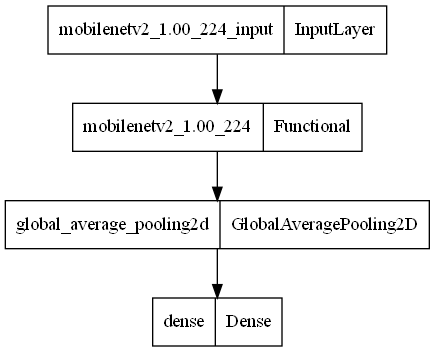

In [14]:
plot_model(model)

In [15]:
history = model.fit(train_data,
epochs= 5,
verbose=1,
batch_size = 6 ,
validation_data = valid_data, callbacks=[callback]
)

Epoch 1/5
5577/5577 [==============================] - 2233s 399ms/step - loss: 0.2076 - accuracy: 0.9358 - val_loss: 0.0424 - val_accuracy: 0.9865
Epoch 2/5
5577/5577 [==============================] - 2227s 399ms/step - loss: 0.0784 - accuracy: 0.9754 - val_loss: 0.0128 - val_accuracy: 0.9965
Epoch 3/5
5577/5577 [==============================] - 2042s 366ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.0612 - val_accuracy: 0.9814
Epoch 4/5
5577/5577 [==============================] - 1916s 344ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0064 - val_accuracy: 0.9978
Epoch 5/5
5577/5577 [==============================] - 1722s 309ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0064 - val_accuracy: 0.9978


In [16]:
model.save("mobile.hdf5")

In [17]:
model.save_weights("mobile.pt")

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_accu(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [20]:
def plot_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

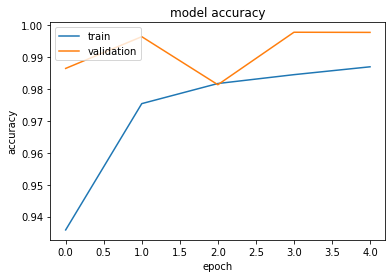

In [21]:
plot_accu(history)


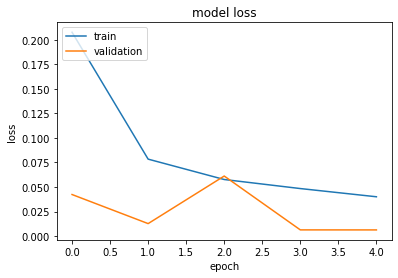

In [22]:
plot_loss(history)

In [3]:
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory(directory="D:/ASL classification/data_2/Data_split/test" , target_size=(200,200) , color_mode="rgb" , batch_size=32 , class_mode="categorical" , shuffle=True , seed = 42)

Found 22332 images belonging to 29 classes.


In [24]:
evaluate = model.evaluate(test_data)

698/698 [==============================] - 104s 149ms/step - loss: 0.0087 - accuracy: 0.9976


In [25]:
test1 = "D:/ASL classification/test1.jpg"

In [26]:
import cv2 

In [27]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [28]:
model = tf.keras.models.load_model("D:\ASL classification\codes\mobile.hdf5")

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("ASL.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\SB584~1.VIK\AppData\Local\Temp\tmp7bnp_d01\assets


INFO:tensorflow:Assets written to: C:\Users\SB584~1.VIK\AppData\Local\Temp\tmp7bnp_d01\assets


Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
predicted class:  [[4.9691301e-10 3.8149359e-11 3.2700243e-10 8.8472746e-13 7.5568198e-12
  1.7236812e-10 2.2146621e-07 3.0940914e-09 8.1372118e-09 1.6825116e-08
  6.7785523e-13 1.5315255e-09 4.7143205e-12 4.9856302e-10 3.9280532e-12
  2.2547304e-06 9.9999750e-01 9.8383476e-13 4.0745875e-11 4.7061949e-10
  1.0773213e-11 4.1244102e-11 8.1880197e-11 1.4514056e-09 4.2691171e-09
  5.9170596e-10 4.7582066e-08 2.6273373e-14 5.5073984e-11]]
16


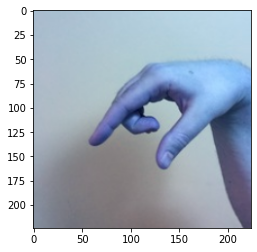

In [30]:
path = "D:/ASL classification/Q0021_test.jpg"

img2 = cv2.imread(path)
img2 = cv2.resize(img2,(224, 224))

x = np.expand_dims(img2, axis=0)
x = preprocess_input(x)
x = x/255

print('Input image shape:', x.shape)


plt.imshow(img2)

preds=model.predict(x)
print("predicted class: ", preds )

print(np.argmax(preds[0]))

In [31]:
!nvidia-smi

Wed Dec 14 16:06:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   56C    P0    24W /  N/A |   3180MiB /  4096MiB |     45%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
model = tf.keras.models.load_model("D:/ASL classification/codes/mobile.hdf5")

In [4]:
y_test = test_data.labels

In [5]:
ypred = np.argmax(model.predict(test_data) , axis = -1)

698/698 [==============================] - 41s 53ms/step


In [6]:
ypred

array([ 6,  5, 15, ...,  6,  1, 19], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix

In [28]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [15]:
matrix = confusion_matrix(y_test,ypred)

In [13]:
labels = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","DEL","NOTHING","SPACE"]

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

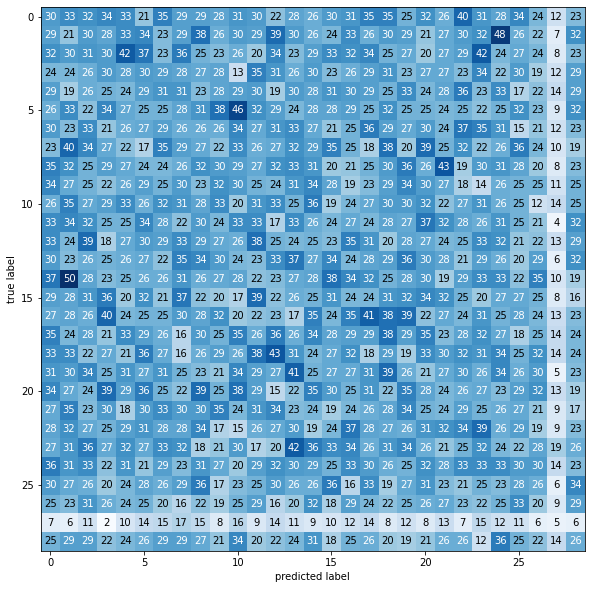

In [30]:
plot_confusion_matrix(matrix , figsize=(10,10))

In [23]:
import matplotlib.pyplot as plt

<Figure size 1440x1440 with 0 Axes>

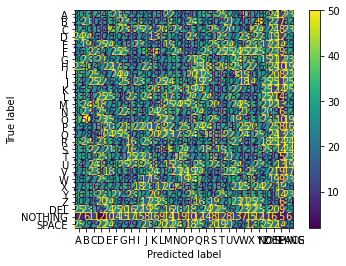

In [26]:
plt.figure(figsize=(20,20))
disp.plot()
plt.show()